In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from scipy import stats
from numpy import arange,array,ones
from scipy import stats

In [3]:
#Read Files
file1 = 'Country and Territory Ratings and Statuses FIW1973-2018 (3).xlsx'
file2 = '../Suicide_Rates/master.csv'
suic_df = pd.read_csv(file2)
dem_df = pd.read_excel(file1, sheet_name=1)

In [4]:
#Change Index
dem_df = dem_df.set_index('Survey Edition')

In [5]:
#Drop unneeded column
dem_df = dem_df.drop('Year(s) Under Review')
dem_df.head()

,1987-88,1987-88.1,1987-88.2,1988-89,1988-89.1,1988-89.2,1989-90,1989-90.1,1989-90.2,1990-91,...,2008.2,2009,2009.1,2009.2,2010,2010.1,2010.2,2011,2011.1,2011.2
Survey Edition,,,,,,,,,,,,,,,,,,,,,
NaN,PR,CL,Status,PR,CL,Status,PR,CL,Status,PR,...,Status,PR,CL,Status,PR,CL,Status,PR,CL,Status
Afghanistan,7,7,NF,6,6,NF,7,7,NF,7,...,PF,5,6,NF,6,6,NF,6,6,NF
Albania,7,7,NF,7,7,NF,7,7,NF,7,...,PF,3,3,PF,3,3,PF,3,3,PF
Algeria,6,6,NF,5,6,NF,6,4,PF,4,...,NF,6,5,NF,6,5,NF,6,5,NF
Andorra,-,-,-,-,-,-,-,-,-,-,...,F,1,1,F,1,1,F,1,1,F


In [6]:
#Generating df perameters
PR_range = range(0,69,3)
CL_range = []
status_range = []
for ran in PR_range:
    CL_range.append(ran + 1)
    status_range.append(ran + 2)

In [7]:
#Parsing different data types
pol_rights_df = dem_df.iloc[:,PR_range]
civ_lib_df = dem_df.iloc[:,CL_range]
status_df = dem_df.iloc[:,status_range]

In [49]:
status_df

,1987-88.2,1988-89.2,1989-90.2,1990-91.2,1991-92.2,1992-93.2,1993-94.2,1994-95.2,1995-96.2,1996-97.2,...,2000-01.2,2001-02.2,2003.2,2004.2,2005.2,2006.2,2007.2,2008.2,2009.2,2010.2
Survey Edition,,,,,,,,,,,,,,,,,,,,,
NaN,Status,Status,Status,Status,Status,Status,Status,Status,Status,Status,...,Status,Status,Status,Status,Status,Status,Status,Status,Status,Status
Afghanistan,NF,NF,NF,NF,NF,NF,NF,NF,NF,NF,...,NF,NF,NF,NF,NF,PF,PF,PF,NF,NF
Albania,NF,NF,NF,NF,PF,PF,PF,PF,PF,PF,...,PF,PF,PF,PF,PF,PF,PF,PF,PF,PF
Algeria,NF,NF,PF,PF,PF,NF,NF,NF,NF,NF,...,NF,NF,NF,NF,NF,NF,NF,NF,NF,NF
Andorra,-,-,-,-,-,-,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
Angola,NF,NF,NF,NF,PF,NF,NF,NF,NF,NF,...,NF,NF,NF,NF,NF,NF,NF,NF,NF,NF
Antigua and Barbuda,F,F,F,F,PF,PF,PF,PF,PF,PF,...,PF,PF,PF,PF,F,F,F,F,F,F
Argentina,F,F,F,F,F,F,F,F,F,F,...,F,PF,PF,F,F,F,F,F,F,F
Armenia,-,-,-,-,PF,PF,PF,PF,PF,PF,...,PF,PF,PF,PF,PF,PF,PF,PF,PF,PF


In [49]:
#pol_rights_df.columns = pol_rights_df.iloc[0,:]
#pol_rights_df = pol_rights_df.drop([0,1])

In [31]:
#Modes of Relevant Data
pol_rights_mode = pol_rights_df.mode(axis=1)
civ_lib_mode = civ_lib_df.mode(axis=1)

In [34]:
#Suicide Data preperation
suic_by_country = suic_df.groupby('country')
suic_by_country = suic_by_country.mean()
suic_by_country = suic_by_country.reset_index()

df_country_and_capital = pd.merge(suic_by_country, pol_rights_mode, on=None, left_on= 'country', right_index = True)
df_country_and_capital = pd.merge(suic_by_country, civ_lib_mode, on=None, left_on= 'country', right_index = True)


In [36]:

#Grabbing needed data
pol_rights_data = df_country_and_capital.iloc[:,7]
suic_data = df_country_and_capital.iloc[:,4]
pol_rights_data = df_country_and_capital.iloc[:,7]

In [37]:
#Cleaning Data
pol_rights_data = [0 if x == '-' else x for x in pol_rights_data]
civ_lib_mode = [0 if x == '-' else x for x in civ_lib_mode]

Text(0, 0.5, 'Political Right Rating')

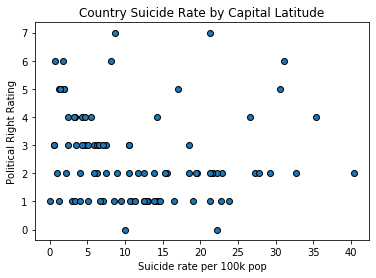

In [38]:
#Plotting Data
plt.scatter(suic_data, pol_rights_data, edgecolors='black')

plt.title("Country Suicide Rate by Capital Latitude")
plt.xlabel("Suicide rate per 100k pop")
plt.ylabel("Political Right Rating")

In [93]:
len(pol_rights_data)

2

In [35]:
df_country_and_capital

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),0,1,2
0,Albania,1999.227273,7.462121,2.360813e+05,3.502879,0.673000,1859.045455,3,NaN,NaN
1,Antigua and Barbuda,1999.481481,0.033951,6.142679e+03,0.552901,0.781667,10448.185185,3,NaN,NaN
2,Argentina,2000.000000,221.018817,2.784907e+06,10.469328,0.779600,7914.096774,3,NaN,NaN
3,Armenia,2002.791946,6.392617,2.595576e+05,3.275872,0.690125,1873.919463,4,NaN,NaN
5,Australia,1999.833333,194.752778,1.506605e+06,12.992806,0.912750,32776.400000,1,NaN,NaN
6,Austria,2000.418848,131.081152,6.383589e+05,23.759764,0.847500,34261.780105,1,NaN,NaN
7,Azerbaijan,1997.625000,8.625000,5.822411e+05,1.855417,0.624500,1005.125000,5,NaN,NaN
8,Bahamas,2001.521739,0.336957,2.375742e+04,1.247391,0.779833,25836.391304,1,NaN,NaN
9,Bahrain,2002.809524,1.837302,6.648383e+04,1.854127,0.804625,18039.523810,5,NaN,NaN
10,Barbados,1999.240000,0.590000,2.071230e+04,2.970433,0.756556,12251.000000,1,NaN,NaN
